<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      500 non-null    int64 
 1   Gender                   500 non-null    object
 2   COVID_Severity           500 non-null    object
 3   Hospitalized             500 non-null    object
 4   Days_to_Recovery         500 non-null    int64 
 5   Fatigue_Level            500 non-null    int64 
 6   Breathing_Issue          500 non-null    object
 7   Brain_Fog                500 non-null    object
 8   Loss_of_Taste_Smell      500 non-null    object
 9   Physical_Activity_Level  500 non-null    object
 10  Mental_Health_Impact     500 non-null    int64 
 11  Long_COVID_Risk          500 non-null    object
dtypes: int64(4), object(8)
memory usage: 47.0+ KB


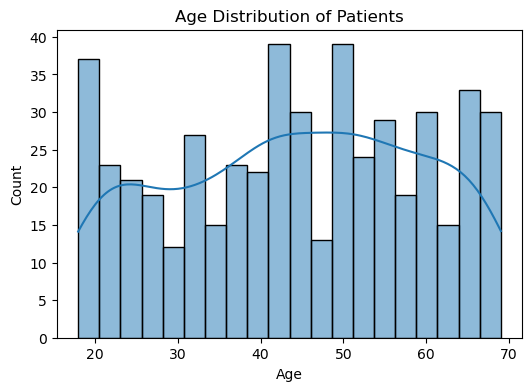

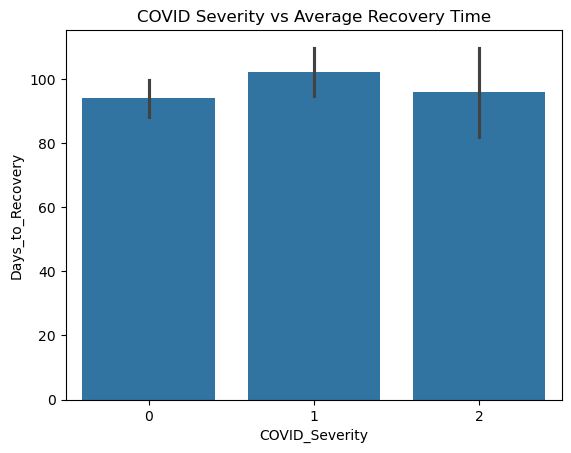

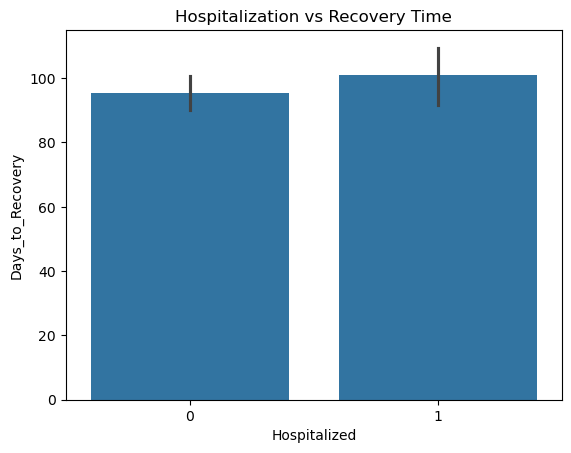

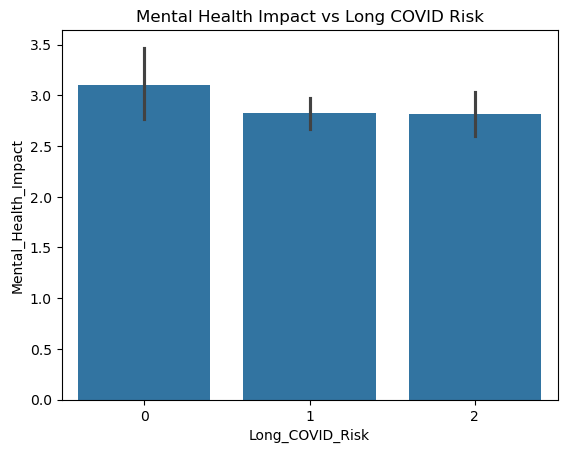

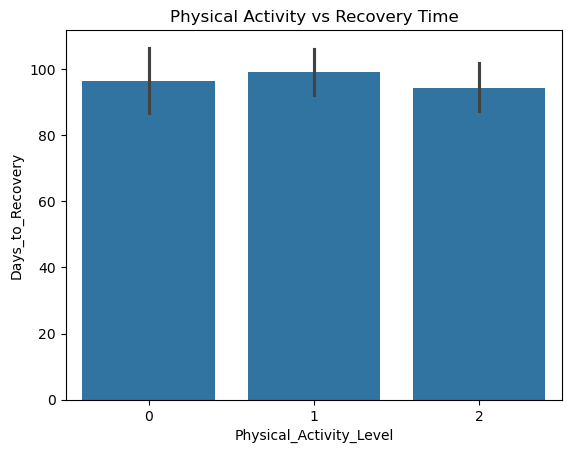

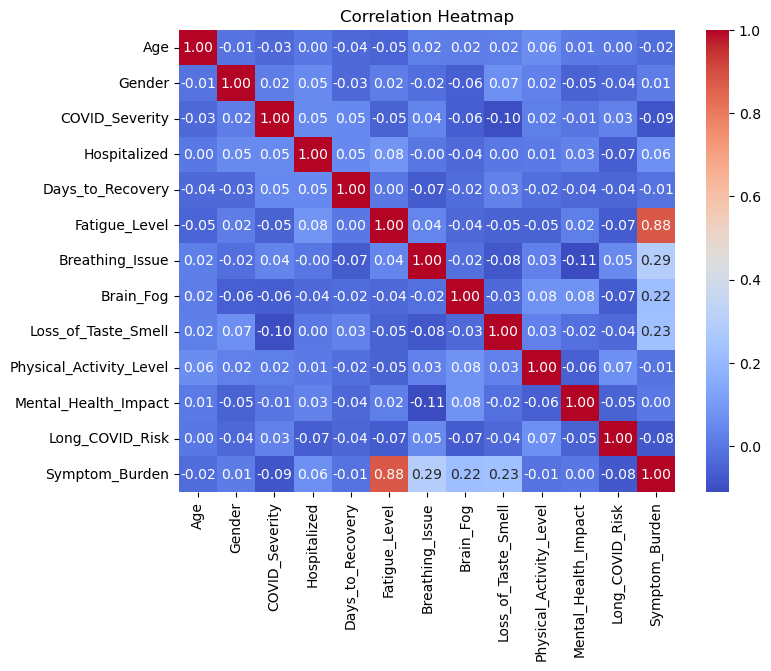

In [3]:
%run Exploratory_Data_Analysis.ipynb

In [6]:
X = df.drop('Long_COVID_Risk', axis=1)
y = df['Long_COVID_Risk']

In [7]:
categorical_cols = ['Gender', 'COVID_Severity', 'Hospitalized', 'Physical_Activity_Level']

In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

In [9]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, 
                                          max_depth=10, 
                                          random_state=42, 
                                          class_weight='balanced'))
])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Random Forest Model...")
model_pipeline.fit(X_train, y_train)

Training Random Forest Model...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Gender', 'COVID_Severity',
                                                   'Hospitalized',
                                                   'Physical_Activity_Level'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        n_estimators=200, random_state=42))])

In [11]:
y_pred = model_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2%}")

Accuracy: 37.00%


In [12]:
ohe_feature_names = model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
numeric_cols = [col for col in X.columns if col not in categorical_cols]
all_feature_names = np.concatenate([ohe_feature_names, numeric_cols])

In [13]:
importances = model_pipeline.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]

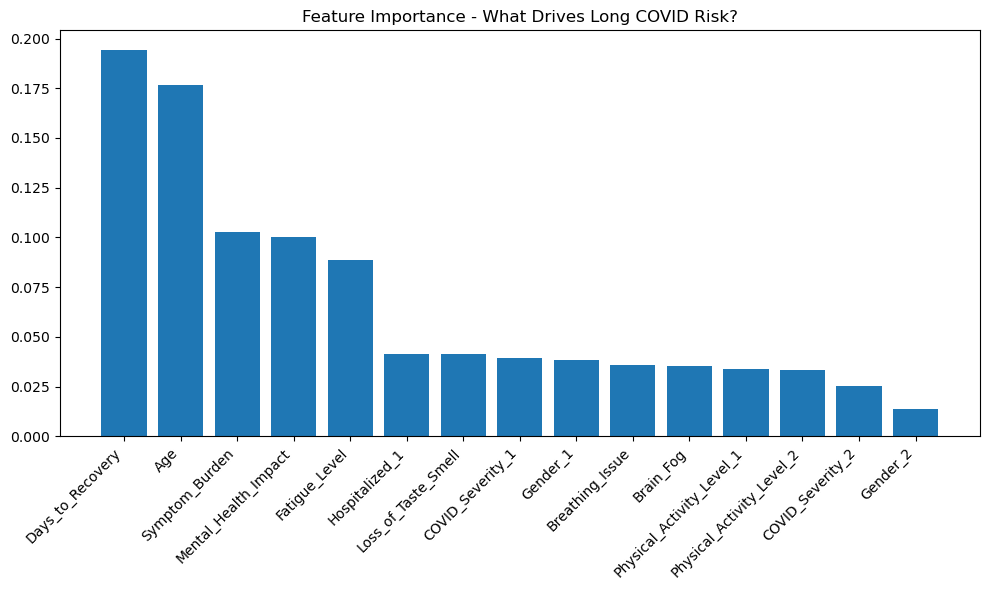

In [14]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - What Drives Long COVID Risk?")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), all_feature_names[indices], rotation=45, ha='right')
plt.tight_layout()
plt.show()